In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model


In [2]:
df = pd.read_csv("/content/HR_comma_sep.csv")

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [56]:
import seaborn as sns

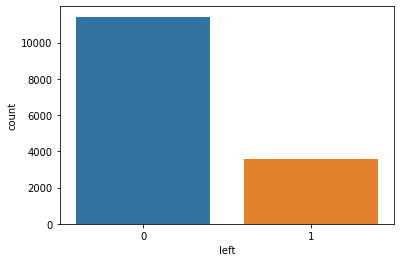

In [58]:
sns.countplot(x = "left",data =df)

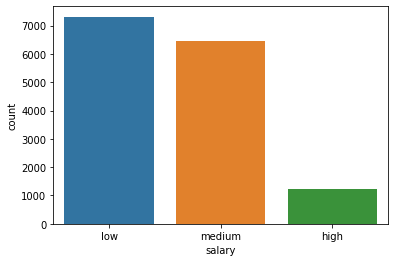

In [59]:
sns.countplot(x = "salary",data = df)

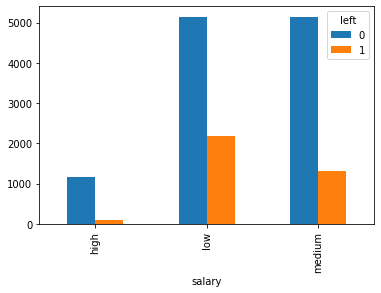

In [55]:
pd.crosstab(df.salary,df.left).plot(kind="bar")

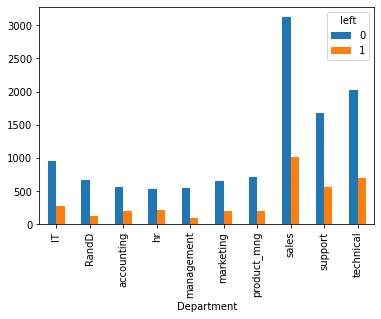

In [50]:
pd.crosstab(df.Department,df.left).plot(kind="bar")

In [11]:
sd = pd.get_dummies(df.salary)

In [14]:
data = df[["satisfaction_level","average_montly_hours","promotion_last_5years","salary"]]

In [32]:
merged = pd.concat([data,sd],axis = "columns")

In [33]:
merged.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [34]:
final= merged.drop("salary",axis = "columns")

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(final,df.left,test_size=0.2)

In [38]:
model = linear_model.LogisticRegression()


In [39]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
7203,0.66,250,0,0,1,0
4277,0.95,193,0,0,0,1
9396,0.47,215,0,0,0,1
2120,0.67,182,0,0,1,0
12757,0.38,151,0,0,1,0
...,...,...,...,...,...,...
69,0.43,135,0,0,0,1
8658,0.74,226,0,0,0,1
4977,0.57,191,0,0,0,1
9761,0.98,132,0,0,0,1


In [40]:
model.fit(X_train,Y_train)

LogisticRegression()

In [41]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
14695,0.38,145,0,0,1,0
3305,0.45,176,0,0,0,1
12226,0.37,158,0,0,1,0
10099,0.55,116,0,0,1,0
12090,0.40,130,0,0,1,0
...,...,...,...,...,...,...
8435,0.57,108,0,0,1,0
6963,0.70,178,0,0,1,0
13089,1.00,201,0,0,1,0
2128,0.52,210,0,0,0,1


In [46]:
model.predict([[0.7,178,0,0,1,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [44]:
model.score(X_test,Y_test)

0.7756666666666666

In [45]:
model.score(X_train,Y_train)

0.7761480123343611